In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris_df = pd.read_csv('Iris.csv')
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
iris_df.drop(columns=['Id'],inplace=True)

In [10]:
iris_df.info()

# Observation 1 : No Null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
col_list = iris_df.columns
col_list

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Exploratory Data Analysis

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

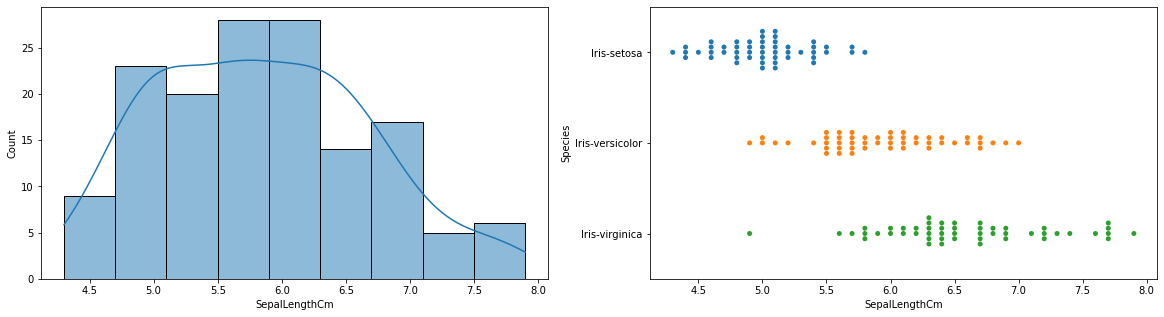

In [33]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.histplot(iris_df['SepalLengthCm'],kde='True',ax=ax[0])
sns.swarmplot(data=iris_df,x='SepalLengthCm',y='Species',ax=ax[1])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

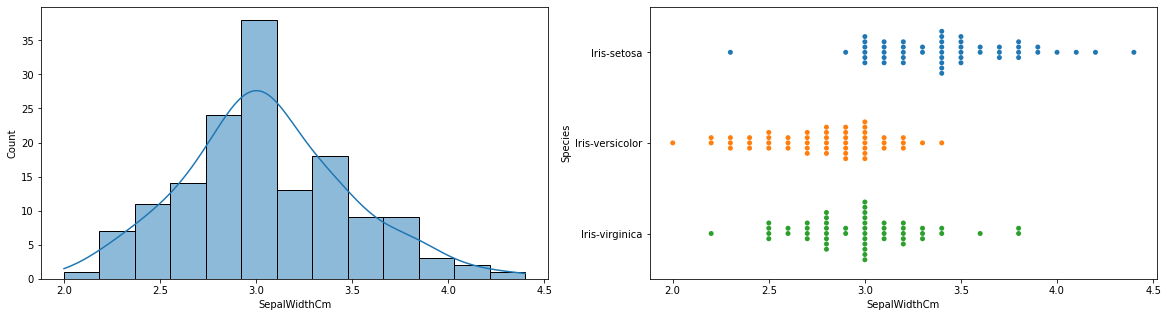

In [34]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.histplot(iris_df['SepalWidthCm'],kde='True',ax=ax[0])
sns.swarmplot(data=iris_df,x='SepalWidthCm',y='Species',ax=ax[1])

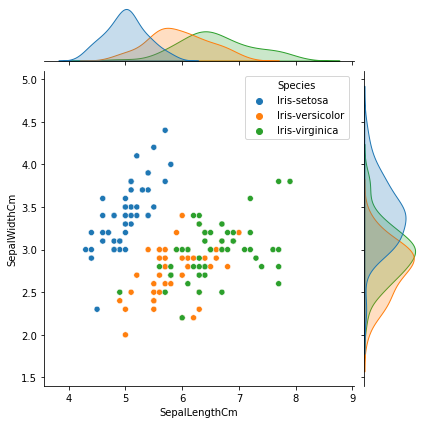

In [36]:
sns.jointplot(data=iris_df,y='SepalWidthCm',x='SepalLengthCm',hue='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

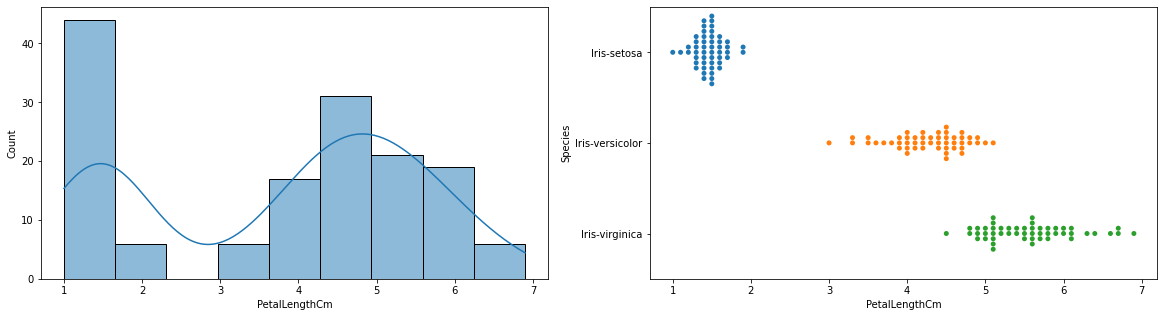

In [37]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.histplot(iris_df['PetalLengthCm'],kde='True',ax=ax[0])
sns.swarmplot(data=iris_df,x='PetalLengthCm',y='Species',ax=ax[1])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

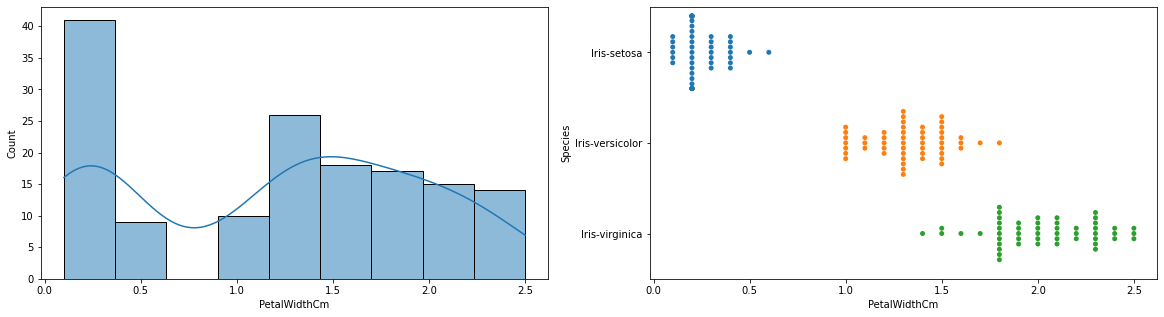

In [38]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.histplot(iris_df['PetalWidthCm'],kde='True',ax=ax[0])
sns.swarmplot(data=iris_df,x='PetalWidthCm',y='Species',ax=ax[1])

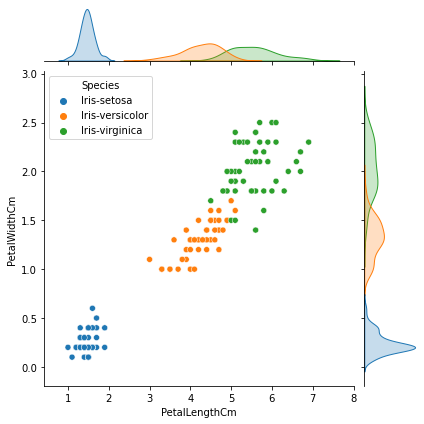

In [41]:
sns.jointplot(data=iris_df,y='PetalWidthCm',x='PetalLengthCm',hue='Species')

# Data Preprocessing

In [44]:
x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,4]

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Optimal value of K 

In [57]:
from sklearn.neighbors import KNeighborsClassifier 

In [58]:
error = []

for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

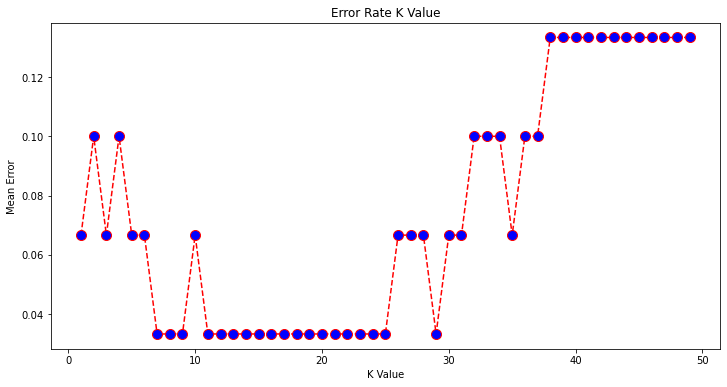

In [60]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

# Training & Prediction

In [61]:
classifier = KNeighborsClassifier(n_neighbors=13)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=13)

In [62]:
y_pred = classifier.predict(x_test)  

In [63]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Confusion matrix & Classification report

In [116]:
from sklearn.metrics import confusion_matrix  

conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted')

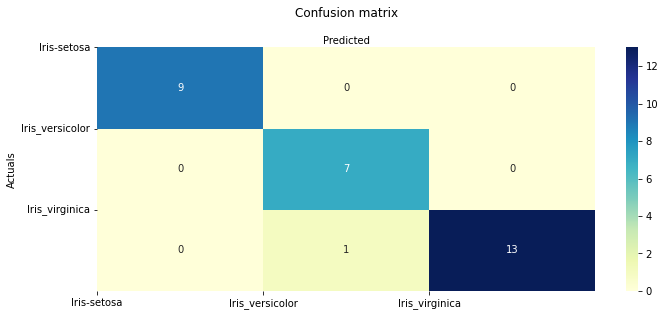

In [112]:
class_names=['Iris-setosa','Iris_versicolor','Iris_virginica'] 
fig, ax = plt.subplots(figsize=(10,4))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names,rotation=0)
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actuals')
plt.xlabel('Predicted')

In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30

